In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import extract_combine as ec
import cv2

In [2]:
# create csv using extract_combine.py
img1 = "../Data/Images/original/2000_LST.bmp"
img2 = "../Data/Images/original/2010_LST.bmp"
img3 = "../Data/Images/original/2020_LST.bmp"
csv1 = "../Data/csv/original/2000_LST.csv"
csv2 = "../Data/csv/original/2010_LST.csv"
csv3 = "../Data/csv/original/2020_LST.csv"

image1= cv2.imread(img1)
h,w = image1.shape[:2]

# # run only once
ec.create_csv(img1, csv1, w, h)
ec.create_csv(img2, csv2, w, h)
ec.create_csv(img3, csv3, w, h)

In [3]:
# Read the CSV files
df_2000 = pd.read_csv(csv1)
df_2010 = pd.read_csv(csv2)
df_2020 = pd.read_csv(csv3)

# Extract the third column as input and output
data_2000 = df_2000.iloc[:, 2].values
data_2010 = df_2010.iloc[:, 2].values
data_2020 = df_2010.iloc[:, 2].values

In [11]:
max(data_2000)

16775936

In [4]:
df_2000.shape, df_2010.shape, df_2020.shape

((1302490, 3), (1302490, 3), (1302490, 3))

In [7]:
# Preprocess the data
# (Perform any necessary preprocessing steps such as scaling or normalization here)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_2000, data_2010, test_size=0.2)

# Reshape the data for LSTM input (assuming 1 feature per timestep)
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1))

In [8]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(1, 1)))  # Adjust the number of units (128) as needed
model.add(Dense(1))  # Output layer with 1 unit

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust batch_size and epochs as needed

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/10
32563/32563 [==============================] - 97s 3ms/step - loss: 124297083355136.0000
Epoch 2/10
32563/32563 [==============================] - 96s 3ms/step - loss: 124296018001920.0000
Epoch 3/10
32563/32563 [==============================] - 95s 3ms/step - loss: 124294390611968.0000
Epoch 4/10
32563/32563 [==============================] - 98s 3ms/step - loss: 124292637392896.0000
Epoch 5/10
32563/32563 [==============================] - 99s 3ms/step - loss: 124291320381440.0000
Epoch 6/10
32563/32563 [==============================] - 92s 3ms/step - loss: 124289718157312.0000
Epoch 7/10
32563/32563 [==============================] - 93s 3ms/step - loss: 124289030291456.0000
Epoch 8/10
32563/32563 [==============================] - 101s 3ms/step - loss: 124287570673664.0000
Epoch 9/10
32563/32563 [==============================] - 95s 3ms/step - loss: 124286522097664.0000
Epoch 10/10
8141/8141 [==============================] - 12s 1ms/step


RMSE: 11155156.280733848


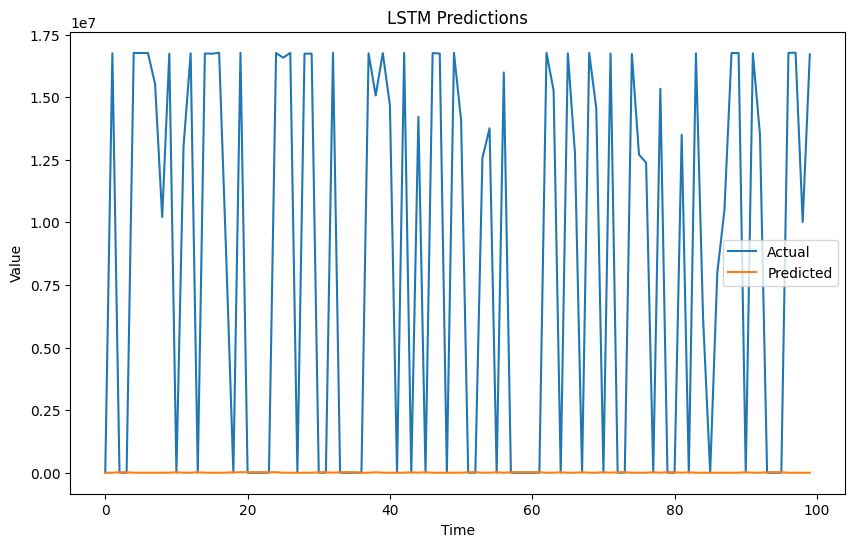

In [10]:
import matplotlib.pyplot as plt
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE:', rmse)

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test[0:100], label='Actual')
plt.plot(predictions[0:100], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LSTM Predictions')
plt.legend()
plt.show()